<a href="https://colab.research.google.com/github/dinonge-star/machine_learning/blob/main/6_3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.decomposition import PCA

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1): 
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show();


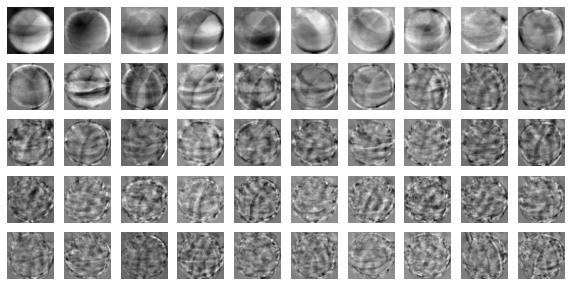

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
# 차원 감소시키기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


(300, 10000)


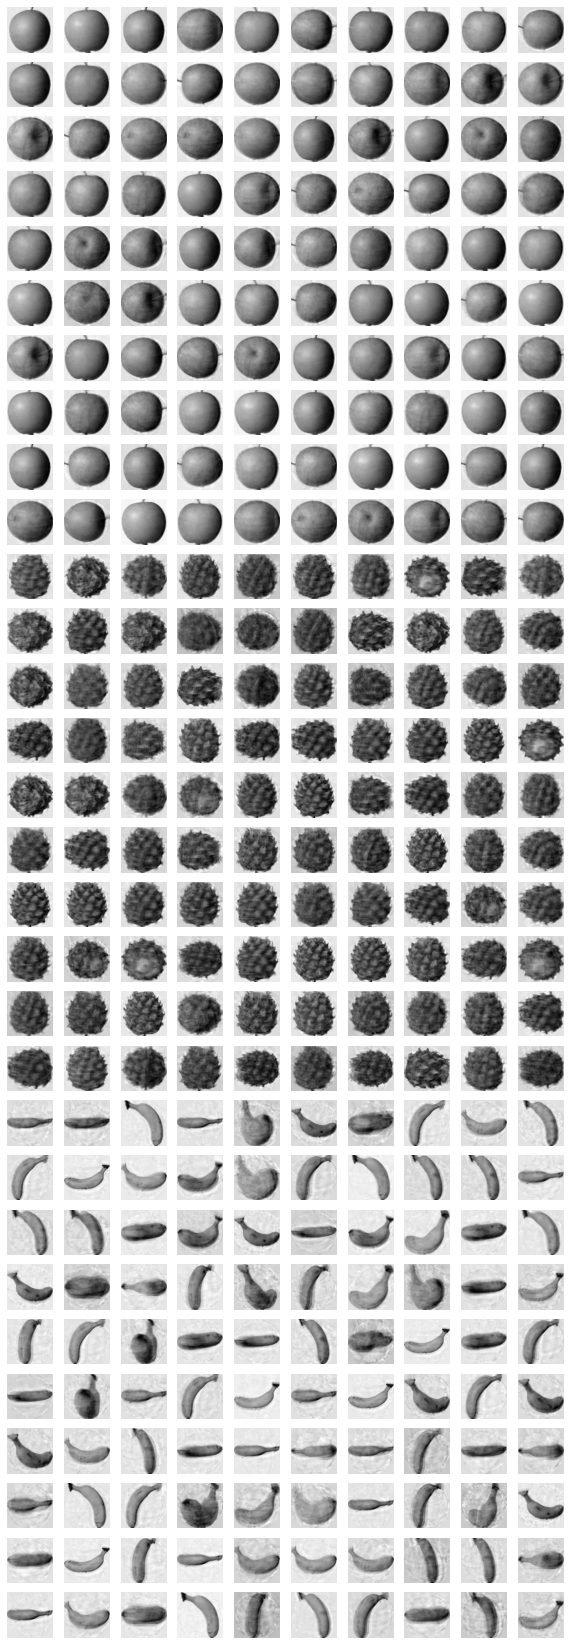

In [10]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(fruits_reconstruct)

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.9215376959585118


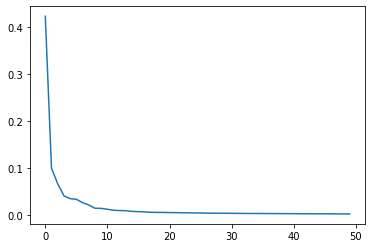

In [12]:
plt.plot(pca.explained_variance_ratio_)

In [13]:
# LogisticRegression 과 함께 사용하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [15]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.2356022834777831


In [16]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#차원 축소한 data 와 원본 데이터 간의 test_score, fit_time 차이를 확인할 수 있음

1.0
0.04258713722229004


In [17]:
# pca components를 다르게 설정
# 지정된 비율에 도달할 때까지 자동으로 주성분을 찾자
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# score 와 fit time 확인을 통해 차원을 두개로만 갖고가도 충분히 분류가 가능하다는 것을 알 수 있었다!

0.9933333333333334
0.03755826950073242


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [25]:
# clustering 과 함께 사용하기

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca) # 기존에 (300, 10000) 데이터 대신 (300, 2) 데이터로 사용

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


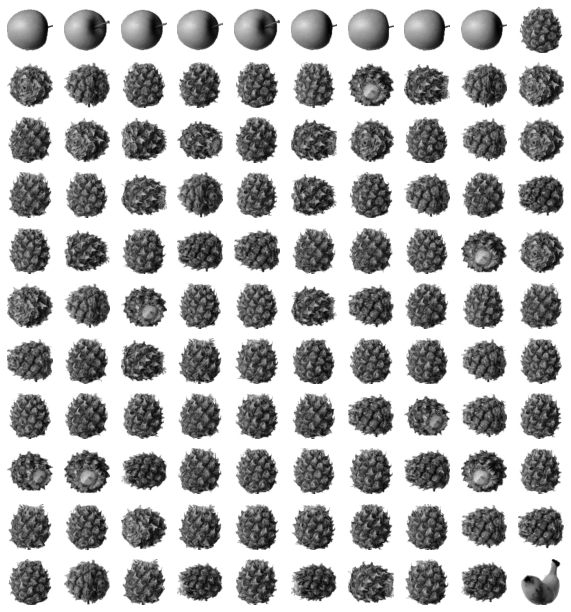

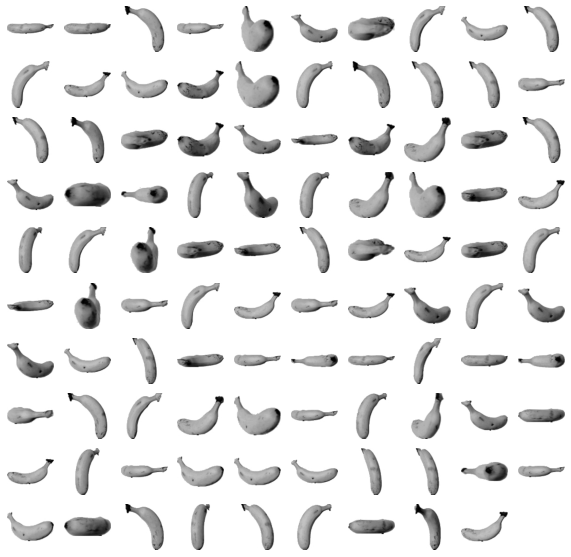

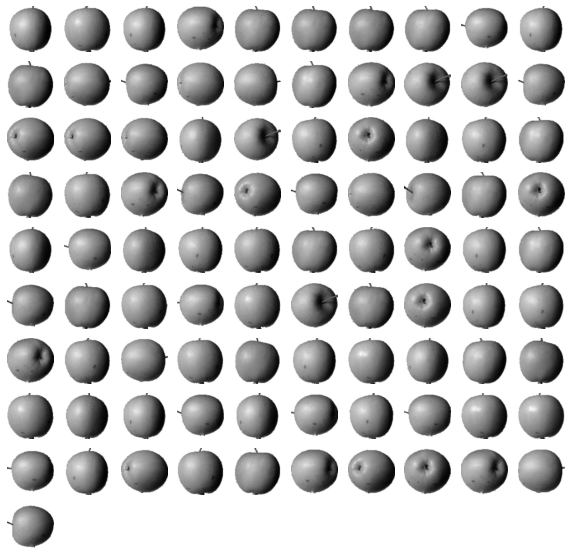

In [26]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

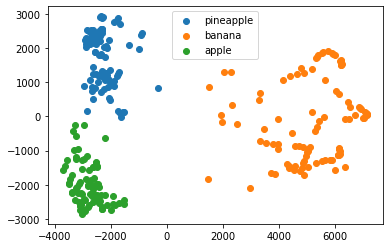

In [29]:
# 차원을 줄이면 화면에 시각화하기가 용이하다 
# (300, 10000) -> 시각화 불가, (300, 2) -> 시각화 가능!

for label in range(0,3): 
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:, 0], data[:,1])

plt.legend(['pineapple','banana', 'apple'])
plt.show();